In [74]:
import matplotlib.pyplot as plt
from strategies import SimpleRSIStrategy
from volume_based_indicator import *
from data_sources import get_resampled_prices_in_range

# Initial settings
transaction_currency =  "REP" #""ETH"
counter_currency = "USDT" #""BTC"
end_time = 1530241441
start_time = end_time - 60 * 60 * 24 * 4
#end_time += 60*60*15
horizon = Horizon.short
resample_period = 60
start_cash = 1
start_crypto = 0
source = 0
strength = 3
AVERAGING_PERIOD = 50

# fill kwargs structure, needed later
kwargs = {}
kwargs['source'] = source
kwargs['transaction_currency'] = transaction_currency
kwargs['counter_currency'] = counter_currency
kwargs['start_time'] = start_time
kwargs['end_time'] = end_time
kwargs['horizon'] = horizon

# Load price and volume data and calculate average prices and volumes
prices_df = get_resampled_prices_in_range(start_time, end_time, transaction_currency, counter_currency, resample_period, source,
            normalize=False)
prices_df = prices_df.sort_index()

volumes_df = get_volumes_in_range(start_time, end_time, transaction_currency, counter_currency, source)
#volumes_df.volume /= 1E4 #5 # scaling for visualization

prices_avg = talib.SMA(np.array(prices_df.close_price, dtype=float), timeperiod=AVERAGING_PERIOD)
prices_df['average_price'] = pd.Series(prices_avg, index=prices_df.index)

if not volumes_df.index.is_unique:
    start_len = len(volumes_df)
    volumes_df = volumes_df[~volumes_df.index.duplicated(keep='first')]
    print(" --> reduced size of volume dataframe from {} to {} because of duplicate data.".format(
        start_len, len(volumes_df)
    ))

volumes_reindexed_df = volumes_df.reindex(prices_df.index, method='nearest')  # TODO find a better way
volumes_reindexed_df = volumes_reindexed_df[~volumes_reindexed_df.index.duplicated()]
volumes_reindexed_df = volumes_reindexed_df.sort_index()

price_volume_df = prices_df.join(volumes_reindexed_df, how='inner')  # to make sure timestamps match
price_volume_df = price_volume_df.sort_index()
volumes_avg = talib.SMA(np.array(price_volume_df['volume'], dtype=float), timeperiod=AVERAGING_PERIOD)



price_volume_df['average_volume'] = pd.Series(volumes_avg, index=price_volume_df.index)


# Convert indexes to datetime
prices_df.index = pd.to_datetime(prices_df.index, unit='s', utc=True)
volumes_df.index = pd.to_datetime(volumes_df.index, unit='s', utc=True)
price_volume_df.index = pd.to_datetime(price_volume_df.index, unit='s', utc=True)

# rename columns so the rest of the code is compatible
price_volume_df = price_volume_df.rename(columns={'close_price': 'price'})

#write_to_excel(prices_df, "prices.xlsx")
#write_to_excel(price_volume_df, "prices_volumes.xlsx")
#write_to_excel(volumes_reindexed_df, "volumes_reindexed.xlsx")



 --> reduced size of volume dataframe from 5545 to 5544 because of duplicate data.


In [75]:
volumes_reindexed_df.index = pd.to_datetime(volumes_reindexed_df.index, unit='s', utc=True)
volumes_reindexed_df

,volume
timestamp,
2018-06-25 04:03:00+00:00,3024.747292
2018-06-25 05:02:00+00:00,2796.285890
2018-06-25 06:01:00+00:00,2798.118522
2018-06-25 07:02:00+00:00,2625.911379
2018-06-25 08:02:00+00:00,2675.095614
2018-06-25 09:03:00+00:00,2114.386404
2018-06-25 10:02:00+00:00,1703.730410
2018-06-25 11:03:00+00:00,1676.350650
2018-06-25 12:03:00+00:00,1801.508158


In [76]:
# First test of a VBI-based strategy
strategy, all_buy_signals, first_cross_buy_signals = build_strategy(price_volume_df, 0.02, 0.02, 
                                                                    buy_only_on_first_cross=True, sell_strategy=None, **kwargs)
orders, _ = strategy.get_orders(start_cash, start_crypto)

All buy
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 19:04:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 20:10:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 21:04:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 22:04:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-29 03:04:00 rsi_value=0


D:\Development\ToptalProjects\IntelligentTrading\ITTscience\backtesting\volume_based_indicator.py:25: RuntimeWarning: invalid value encountered in greater
  if price > (1 + percent_change_price)*avg_price and volume > (1 + percent_change_volume)*avg_volume:


In [77]:
#write_to_excel(volumes_df, "volumes.xlsx")
#write_to_excel(volumes_reindexed_df, "volumes_reindexed.xlsx")

In [78]:
for signal in all_buy_signals:
    print(str(signal), signal.price)
    
print("FIRST CROSS:")
    
for signal in first_cross_buy_signals:
    print(str(signal), signal.price)



rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 19:04:00 rsi_value=0 3356805690
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 20:10:00 rsi_value=0 3500000039
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 21:04:00 rsi_value=0 3400015513
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 22:04:00 rsi_value=0 3219578022
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-29 03:04:00 rsi_value=0 3223781099
FIRST CROSS:
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 19:04:00 rsi_value=0 3356805690
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-29 03:04:00 rsi_value=0 3223781099


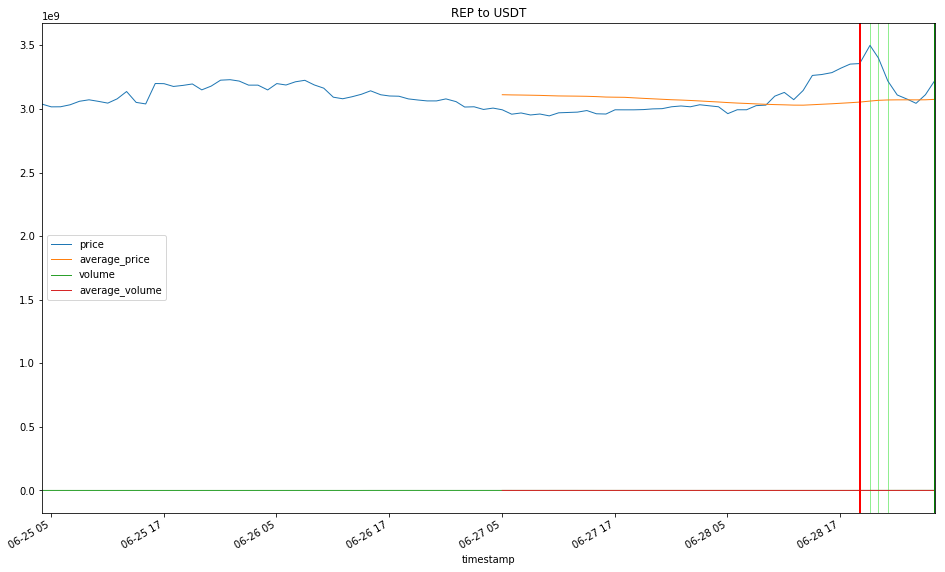

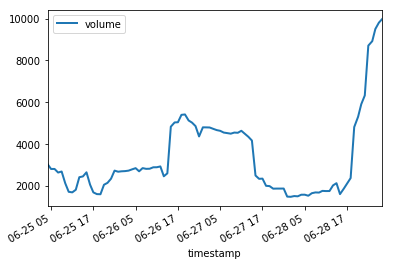

In [79]:
price_volume_df_plot = price_volume_df.copy()
price_volume_df_plot['volume'] *= 50
price_volume_df_plot['average_volume'] *= 50
plot_results(price_volume_df_plot, volumes_reindexed_df, transaction_currency, counter_currency, all_buy_signals,
             first_cross_buy_signals, orders, include_all_buy=True, include_first_cross=True, include_orders=True)



In [73]:
price_volume_df['div_price'] = price_volume_df['price'] / price_volume_df['average_price'] * 100
price_volume_df['div_volume'] = price_volume_df['volume'] / price_volume_df['average_volume'] * 100
price_volume_df

,price,average_price,volume,average_volume,div_price,div_volume
timestamp,,,,,,
2018-06-25 04:02:00+00:00,489660,NaN,3870.641246,NaN,NaN,NaN
2018-06-25 05:01:00+00:00,494481,NaN,3694.561288,NaN,NaN,NaN
2018-06-25 06:01:00+00:00,493622,NaN,3719.984667,NaN,NaN,NaN
2018-06-25 07:01:00+00:00,496827,NaN,3596.335337,NaN,NaN,NaN
2018-06-25 08:01:00+00:00,495433,NaN,3571.577892,NaN,NaN,NaN
2018-06-25 09:02:00+00:00,495346,NaN,3542.495443,NaN,NaN,NaN
2018-06-25 10:01:00+00:00,495053,NaN,3219.750199,NaN,NaN,NaN
2018-06-25 11:02:00+00:00,493000,NaN,3107.524096,NaN,NaN,NaN
2018-06-25 12:02:00+00:00,497582,NaN,3804.812956,NaN,NaN,NaN
